In [34]:
import datetime

# there's a good igc parser here (in javascript)
# https://github.com/GlidingWeb/IgcWebview2/blob/master/src/igc.js

def GLoadIGC(fname):
    fin = open(fname, "rb")   # sometimes get non-ascii characters in the header
    IGCdatetime0 = None
    recs, tind = [ ], [ ]
    cdeclarations = [ ]
    prevutime = 0
    utimeoffset = 0   # handle the austrialia midday problem with utm
    hfparams = { }
    for l in fin:
        l = l.decode("utf8") 
        if l[:5] == 'HFDTE':    #  HFDTE090317
            IGCdatetime0 = datetime.datetime(2000+int(l[9:11]), int(l[7:9]), int(l[5:7]))
        elif l[:2] == 'HF':
            ic = l.find(":")
            if (ic != -1):
                hfparams[l[2:ic]] = l[ic+1:].strip()
            
        elif l[0] == "B":   #  B1523345257365N00308169WA0030800393000
            utime = int(l[1:3])*3600+int(l[3:5])*60+int(l[5:7]) + utimeoffset
            if utime < prevutime - 1000:
                utimeoffset += 3600*24
                utime += 3600*24
            latminutes1000 = int(l[7:9])*60000+int(l[9:11])*1000+int(l[11:14])
            lngminutes1000 = (int(l[15:18])*60000+int(l[18:20])*1000+int(l[20:23]))*(l[23]=='E' and 1 or -1) 
            s = int(l[35:]) if len(l) >= 40 else 0
            t = IGCdatetime0 + datetime.timedelta(seconds=utime)
            recs.append((lngminutes1000/60000.0, latminutes1000/60000.0, int(l[25:30]), int(l[30:35]), s, t))
            
        elif l[0] == "C":
            #C4323900N01240233ESCH059
            l = "......"+l 
            latminutes1000 = int(l[7:9])*60000+int(l[9:11])*1000+int(l[11:14])
            lngminutes1000 = (int(l[15:18])*60000+int(l[18:20])*1000+int(l[20:23]))*(l[23]=='E' and 1 or -1) 
            nm = l[24:].strip()
            cdeclarations.append((lngminutes1000/60000.0, latminutes1000/60000.0, nm))
            
        else:
            print(l)
    return hfparams, recs, cdeclarations



AFLY08091

I013638TAS

E110630PEV

E130859PEV

GCA1F7481420E12BBA8EC05FED2C2BD17

G31D5A4FFE325777BA65784CC68C76B41

G137F26DE7989016400747E96018CDF60

G000000000000000000120000FC000000



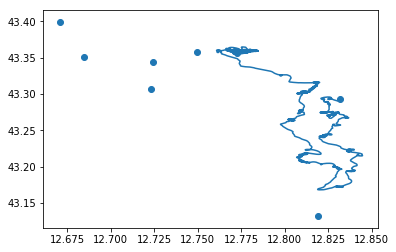

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

fname = "examples/76QB0911.IGC"
hfparams, recs, cdeclarations = GLoadIGC(fname)

plt.plot([rec[0]  for rec in recs], [rec[1]  for rec in recs])
plt.scatter([cdec[0]  for cdec in cdeclarations], [cdec[1]  for cdec in cdeclarations])
